<a href="https://colab.research.google.com/github/mifm/examples/blob/master/SSMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/basic-plugins/support-structure-mass-surrogate.git

In [2]:
from ssms.curve_fit_monopile import trainQLS
from ssms.load_QLS import QLSModel, get_r2
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from ssms.models import model_path

IP: 3.4MW


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


output channel: monopile_mass
[823276.19945048]
[823276.19945048 878853.4565271 ]


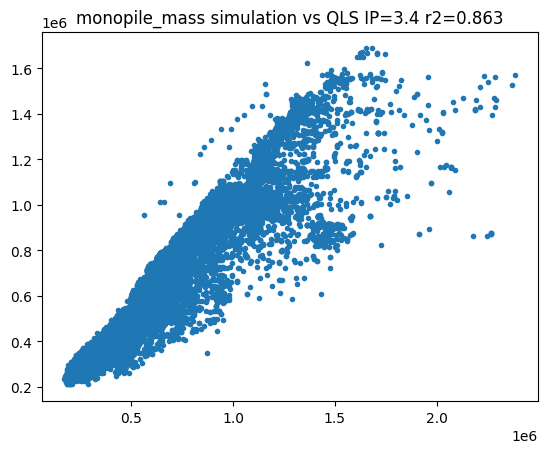

In [3]:
surrogate_path = os.path.join(model_path, 'QLS')
model_indicator = '_QLS_surrogate_model.pickle'

files = []
IPs = []
for file in os.listdir(surrogate_path):
    if model_indicator in file:
        IP = float(file.split(model_indicator)[0])
        files.append(file)
        IPs.append(IP)

IP_item = 2
IP = IPs[IP_item]
print(f'IP: {IP}MW')
path = os.path.join(surrogate_path, files[IP_item])
with open(path, 'rb') as f:
    dic = pickle.load(f)

input_channel_names = dic['input_channel_names']
output_channel_names = dic['output_channel_names']
out_item = 0
output_channel = output_channel_names[out_item]
print(f'output channel: {output_channel}')
df = dic['df']

# plot simulated and predicted data
plt.figure()
r2 = get_r2(df[output_channel], df[output_channel + '_fit'])
plt.plot(df[output_channel], df[output_channel + '_fit'], '.')
plt.title(f'{output_channel} simulation vs QLS IP={IP} r2={r2:.3f}')

# predict
qlsm = QLSModel(dic['models'][out_item], dic['input_scaler'], dic['output_scalers'][output_channel])
# float input
res = qlsm.predict(RP=11, D=214, HTrans=13, HHub_Ratio=0.7, WaterDepth=32, WaveHeight=3.5, WavePeriod=6, WindSpeed=9)
print(res)

# array-like input
res = qlsm.predict(RP=[11, 12], D=[214, 220], HTrans=[13, 14], HHub_Ratio=2 * [0.7], WaterDepth=2 * [32], WaveHeight=2 * [3.5], WavePeriod=2 * [6], WindSpeed=2 * [9])
print(res)


Text(0, 0.5, 'Monopile mass [kg]')

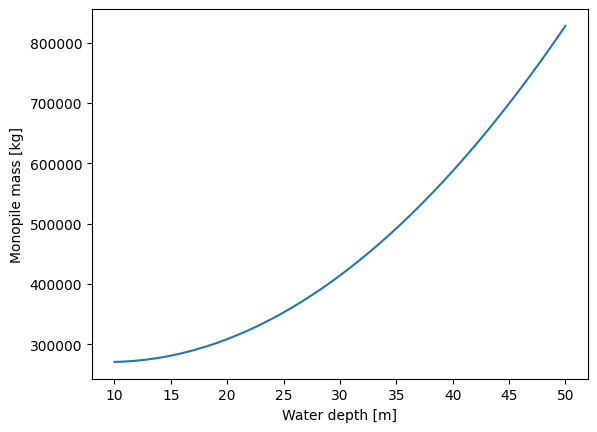

In [4]:
N_points = 100

# INPUTS
RP = np.asarray(N_points * [4])  # MW
SP = 350  # W/m2
D = 2 * np.sqrt(RP * 1e6 / (np.pi * SP))  # m
HTrans = N_points * [10]
HHub_Ratio = N_points * [0.7]
WaterDepth = np.linspace(10, 50, N_points)
WaveHeight = N_points * [3.5]
WavePeriod = N_points * [6]
WindSpeed = N_points * [9]

# OUTPUTS
mass = qlsm.predict(RP=RP, D=D, HTrans=HTrans, HHub_Ratio=HHub_Ratio, WaterDepth=WaterDepth, WaveHeight=WaveHeight, WavePeriod=WavePeriod, WindSpeed=WindSpeed)  # kg

# PLOT the results
plt.plot(WaterDepth, mass)
plt.xlabel('Water depth [m]')
plt.ylabel('Monopile mass [kg]')



Text(0, 0.5, 'Monopile mass [kg]')

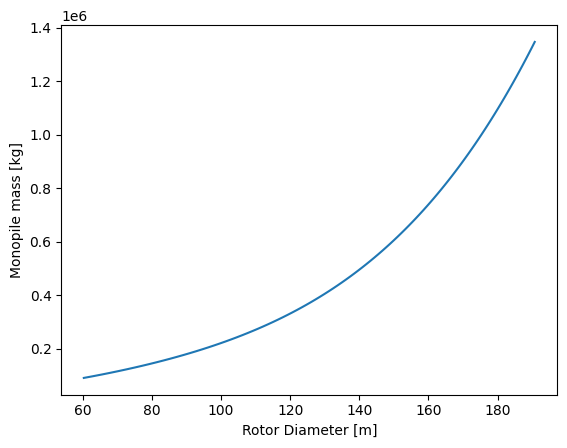

In [5]:
N_points = 100

# INPUTS
SP = 350  # W/m2
RP = np.linspace(1,10,N_points) # MW
D = 2 * np.sqrt(RP * 1e6 / (np.pi * SP))  # m
HTrans = N_points * [10]
HHub_Ratio = N_points * [0.7]
WaterDepth = np.linspace(10, 50, N_points)
WaveHeight = N_points * [3.5]
WavePeriod = N_points * [6]
WindSpeed = N_points * [9]

# OUTPUTS
mass = qlsm.predict(RP=RP, D=D, HTrans=HTrans, HHub_Ratio=HHub_Ratio, WaterDepth=WaterDepth, WaveHeight=WaveHeight, WavePeriod=WavePeriod, WindSpeed=WindSpeed)  # kg

# PLOT the results
plt.plot(D, mass)
plt.xlabel('Rotor Diameter [m]')
plt.ylabel('Monopile mass [kg]')